## $l_1$ and $l_\infty$ Regression

Some code is given below to generate a synthetic dataset.  Using CVX, solve two linear programs for computing the regression line for $l_1$ and $l_\infty$ regression.  Plot the lines over the data to evaluate the fit.

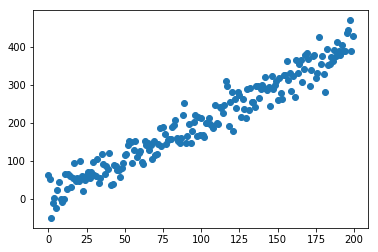

In [192]:
# l_1 and l_infinity regression using cvxpy
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

# generate a synthetic dataset

#actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# datapoints
x = np.arange(0,N)
y = theta1_act * x + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)

plt.figure()
# Scatter plot of data
plt.scatter(x,y)
plt.show()


# $l_1$ regression

In [193]:
# Add your code here!
X = np.vstack([x, np.ones(N)]).T
Y = y.T
# HINT: you will first want to declare a variable for the parameters of the line
theta = cvx.Variable((2,1))

# For the l_1 case, you will also need a vector of slack variables.
# declare slack variables
s = cvx.Variable((N,1))

# Create constraints
con = [-X@theta-s <= -Y,
       X@theta-s <= Y]

# Form objective.
obj = cvx.Minimize(np.ones(N)@s)

# Form and solve problem.
prob = cvx.Problem(obj, con)
prob.solve()  # Returns the optimal value.

print("status:", prob.status)
theta_l_1 = theta.value[:,0]
s_l_1 = s.value
optimal_val_l_1 = prob.value

print("optimal theta", theta_l_1)
print("optimal value", optimal_val_l_1)

status: optimal
optimal theta [1.99569647 4.33443006]
optimal value 4666.536689765973


# $l_\infty$ regression

In [194]:
# Add your code here!

# parameters of the line
theta = cvx.Variable((2,1))

# declare slack variables
s = cvx.Variable()

# Create constraints
con = [-X@theta-s*np.ones((N,1)) <= -Y,
       X@theta-s*np.ones((N,1)) <= Y]

# Form objective.
obj = cvx.Minimize(s)

# Form and solve problem.
prob = cvx.Problem(obj, con)
prob.solve()  # Returns the optimal value.

print("status:", prob.status)
theta_l_inf = theta.value[:,0]
s_l_inf = s.value
optimal_val_l_inf = prob.value

print("optimal_theta", theta_l_inf)
print("optimal value", optimal_val_l_inf)

status: optimal
optimal_theta [1.97198872 3.11316689]
optimal value 79.30183240845928


In [195]:
# $l_2$ regression

In [196]:
theta_l_2 = np.linalg.inv(X.transpose()@X)@X.transpose()@Y[:,0]
print(theta_l_2)

[1.99834751 5.55891871]


# Plot

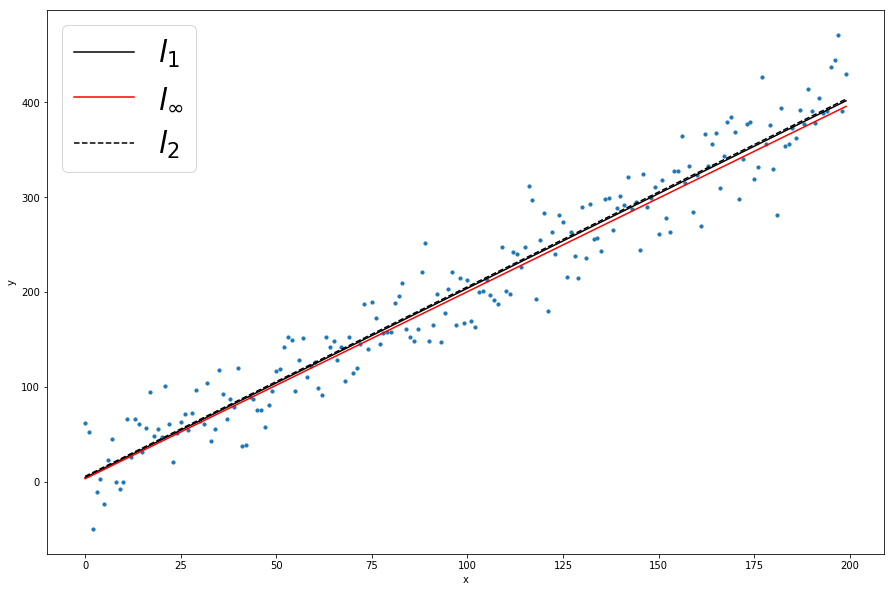

In [216]:
def y_hat(theta):
    theta1, theta2 = theta[0], theta[1]
    return theta1 * x + theta2 
plt.figure(figsize=(15,10))
# Scatter plot of data
plt.scatter(x,y,s=10)
plt.plot(x, y_hat(theta_l_1), '-k', label='$l_1$')
plt.plot(x, y_hat(theta_l_inf), '-r', label='$l_\infty$')
plt.plot(x, y_hat(theta_l_2), '--k', label='$l_2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(prop={'size': 30})
plt.show()